In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
import shutil
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Embedding, Concatenate, Conv2DTranspose, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torch.nn.functional as F

In [ ]:
def process_and_save_txt_file(file_path, output_folder):
    try:
        data = np.loadtxt(file_path)
        fs = 178
        f, t, Sxx = spectrogram(data, fs)
        plt.figure(figsize=(8, 4))
        plt.pcolormesh(t, f, np.log(Sxx + 1e-10), cmap='viridis')
        plt.axis('off')
        file_name = os.path.splitext(os.path.basename(file_path))[0]
        image_path = os.path.join(output_folder, f'{file_name}_spectrogram.png')
        plt.savefig(image_path, bbox_inches='tight', pad_inches=0)
        plt.close()
        print(f"Saved: {file_name}_spectrogram.png")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

main_directory ='/content/drive/My Drive/Epiletic-Seizure-GANs/Data'


for folder_name in ['A', 'B', 'C', 'D', 'E']:
    folder_path = os.path.join(main_directory, folder_name)
    output_folder = os.path.join(main_directory, f'{folder_name}_images')
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.txt'):  # Process both .txt and .TXT files
            file_path = os.path.join(folder_path, filename)
            process_and_save_txt_file(file_path, output_folder)
            print(f"Processed: {filename}")

    print(f"Folder {folder_name} processed. Images saved in: {output_folder}")


Saved: Z056_spectrogram.png
Processed: Z056.txt
Saved: Z065_spectrogram.png
Processed: Z065.txt
Saved: Z013_spectrogram.png
Processed: Z013.txt
Saved: Z020_spectrogram.png
Processed: Z020.txt
Saved: Z014_spectrogram.png
Processed: Z014.txt
Saved: Z083_spectrogram.png
Processed: Z083.txt
Saved: Z004_spectrogram.png
Processed: Z004.txt
Saved: Z016_spectrogram.png
Processed: Z016.txt
Saved: Z066_spectrogram.png
Processed: Z066.txt
Saved: Z023_spectrogram.png
Processed: Z023.txt
Saved: Z099_spectrogram.png
Processed: Z099.txt
Saved: Z098_spectrogram.png
Processed: Z098.txt
Saved: Z048_spectrogram.png
Processed: Z048.txt
Saved: Z094_spectrogram.png
Processed: Z094.txt
Saved: Z090_spectrogram.png
Processed: Z090.txt
Saved: Z084_spectrogram.png
Processed: Z084.txt
Saved: Z062_spectrogram.png
Processed: Z062.txt
Saved: Z063_spectrogram.png
Processed: Z063.txt
Saved: Z034_spectrogram.png
Processed: Z034.txt
Saved: Z033_spectrogram.png
Processed: Z033.txt
Saved: Z029_spectrogram.png
Processed: Z

In [ ]:
image_folders = {
    'healthy': ['A_images', 'B_images'],
    'pre-ictal': ['C_images', 'D_images'],
    'epilepsy': ['E_images']
}

merged_dir = os.path.join(main_directory, 'Images/Three-Classes/Merged')
os.makedirs(merged_dir, exist_ok=True)

for category, folders in image_folders.items():
    category_dir = os.path.join(merged_dir, category)
    os.makedirs(category_dir, exist_ok=True)
    for folder in folders:
        folder_path = os.path.join(main_directory, folder)
        for filename in os.listdir(folder_path):
            if filename.endswith('.png'):
                file_path = os.path.join(folder_path, filename)
                dest_path = os.path.join(category_dir, f"{folder}_{filename}")
                shutil.copy(file_path, dest_path)
                print(f"Copied: {filename} to {category}")

print("Images merged into categories successfully.")


Copied: Z056_spectrogram.png to healthy
Copied: Z099_spectrogram.png to healthy
Copied: Z065_spectrogram.png to healthy
Copied: Z083_spectrogram.png to healthy
Copied: Z066_spectrogram.png to healthy
Copied: Z004_spectrogram.png to healthy
Copied: Z014_spectrogram.png to healthy
Copied: Z023_spectrogram.png to healthy
Copied: Z020_spectrogram.png to healthy
Copied: Z013_spectrogram.png to healthy
Copied: Z016_spectrogram.png to healthy
Copied: Z098_spectrogram.png to healthy
Copied: Z048_spectrogram.png to healthy
Copied: Z094_spectrogram.png to healthy
Copied: Z084_spectrogram.png to healthy
Copied: Z062_spectrogram.png to healthy
Copied: Z090_spectrogram.png to healthy
Copied: Z063_spectrogram.png to healthy
Copied: Z034_spectrogram.png to healthy
Copied: Z029_spectrogram.png to healthy
Copied: Z033_spectrogram.png to healthy
Copied: Z050_spectrogram.png to healthy
Copied: Z071_spectrogram.png to healthy
Copied: Z018_spectrogram.png to healthy
Copied: Z045_spectrogram.png to healthy


In [ ]:
image_folders = ['epilepsy', 'healthy', 'pre-ictal']

train_dir = os.path.join(merged_dir, 'Train')
val_dir = os.path.join(merged_dir, 'Validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for folder in image_folders:
    folder_path = os.path.join(merged_dir, folder)
    train_folder = os.path.join(train_dir, folder)
    val_folder = os.path.join(val_dir, folder)
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(val_folder, exist_ok=True)

    image_files = os.listdir(folder_path)
    train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

    for file in train_files:
        shutil.copy(os.path.join(folder_path, file), os.path.join(train_folder, file))

    for file in val_files:
        shutil.copy(os.path.join(folder_path, file), os.path.join(val_folder, file))

print("Dataset split into train and validation sets successfully.")


Dataset split into train and validation sets successfully.


Second Part:
Genarte Data for the three classes Using:
 1. Conditional GAN (CGAN)
 2. Wasserstein GAN (WGAN)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


img_width, img_height = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax') # 3 output classes
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)


loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))


cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'train_dir' is not defined

Accuracy: 0.9948717948717949
              precision    recall  f1-score   support

    epilepsy       1.00      1.00      1.00        41
     healthy       1.00      0.99      0.99        77
   pre-ictal       0.99      1.00      0.99        77

    accuracy                           0.99       195
   macro avg       1.00      1.00      1.00       195
weighted avg       0.99      0.99      0.99       195



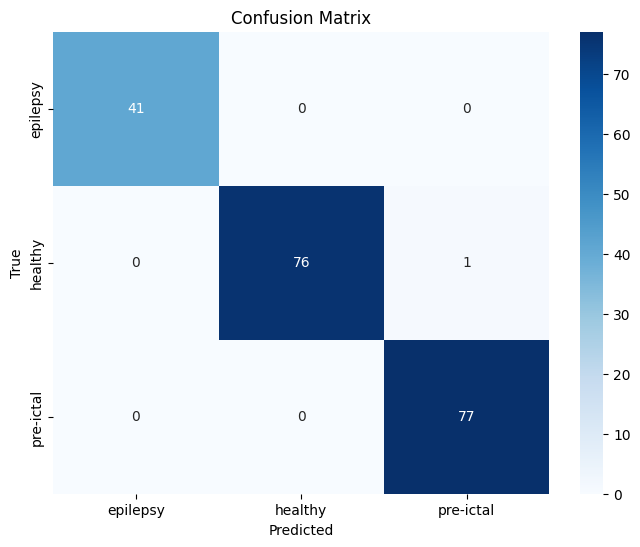

In [29]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)


model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42) # 3 classes
model.fit(X_train_flat, y_train)

y_pred = model.predict(X_val_flat)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_val, y_pred, target_names=validation_generator.class_indices.keys()))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [4]:
from torch.utils.data import Dataset
class SpectrogramDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        categories = ['epilepsy', 'healthy', 'pre-ictal']
        for label, category in enumerate(categories):
            category_dir = os.path.join(data_dir, category)
            for img_name in os.listdir(category_dir):
                if img_name.endswith('.png'):
                    self.image_paths.append(os.path.join(category_dir, img_name))
                    self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        img = Image.open(img_path).convert('RGB')

        if self.transform:
            img = self.transform(img)

        return img, label


In [7]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])


train_dir = '/content/drive/MyDrive/Data/Images/Three-Classes/Merged/Train'
val_dir = '/content/drive/MyDrive/Data/Images/Three-Classes/Merged/Validation'


train_dataset = SpectrogramDataset(data_dir=train_dir, transform=transform)
val_dataset = SpectrogramDataset(data_dir=val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


In [8]:
class Generator(nn.Module):
    def __init__(self, input_dim=10, im_chan=3, hidden_dim=64):
        super(Generator, self).__init__()
        self.input_dim = input_dim
        self.gen = nn.Sequential(
            # output 64x64 images
            self.make_gen_block(input_dim, hidden_dim * 8, kernel_size=4, stride=1, padding=0),
            self.make_gen_block(hidden_dim * 8, hidden_dim * 4, kernel_size=4, stride=2, padding=1),
            self.make_gen_block(hidden_dim * 4, hidden_dim * 2, kernel_size=4, stride=2, padding=1),
            self.make_gen_block(hidden_dim * 2, hidden_dim, kernel_size=4, stride=2, padding=1),
            self.make_gen_block(hidden_dim, im_chan, kernel_size=4, stride=2, padding=1, final_layer=True),
        )

    def make_gen_block(self, input_channels, output_channels, kernel_size=3, stride=2, padding=0, final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride, padding),
                nn.BatchNorm2d(output_channels),
                nn.ReLU(inplace=True),
            )
        else:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride, padding),
                nn.Tanh(),
            )

    def forward(self, noise):
        x = noise.view(len(noise), self.input_dim, 1, 1)
        return self.gen(x)

In [9]:
class Discriminator(nn.Module):
    def __init__(self, im_chan=1, hidden_dim=64):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            self.make_disc_block(im_chan, hidden_dim),
            self.make_disc_block(hidden_dim, hidden_dim * 2),
            self.make_disc_block(hidden_dim * 2, 1, final_layer=True),
        )

    def make_disc_block(self, input_channels, output_channels, kernel_size=4, stride=2, final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.LeakyReLU(0.2, inplace=True),
            )
        else:
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride),
            )

    def forward(self, image):
        disc_pred = self.disc(image)
        return disc_pred.view(len(disc_pred), -1)

def get_noise(n_samples, input_dim, device='cpu'):
    return torch.randn(n_samples, input_dim, device=device)

def get_one_hot_labels(labels, n_classes):
    return F.one_hot(labels, n_classes)

def combine_vectors(x, y):
    return torch.cat((x, y), 1)

In [10]:
z_dim = 64
n_classes = 3
image_shape = (3, 64, 64)

In [11]:
import torch.optim as optim

generator_input_dim = z_dim + n_classes
discriminator_im_chan = image_shape[0] + n_classes

gen = Generator(input_dim=generator_input_dim).to(device='cpu')
disc = Discriminator(im_chan=discriminator_im_chan).to(device='cpu')

gen_opt = optim.Adam(gen.parameters(), lr=0.0002)
disc_opt = optim.Adam(disc.parameters(), lr=0.0002)

def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)
gen.apply(weights_init)
disc.apply(weights_init)

criterion = nn.BCEWithLogitsLoss()

In [12]:
from PIL import Image

for epoch in range(20):
    for real, labels in tqdm(train_loader):
        real = real.to(device='cpu')
        one_hot_labels = get_one_hot_labels(labels.to(device='cpu'), n_classes)
        image_one_hot_labels = one_hot_labels[:, :, None, None].repeat(1, 1, image_shape[1], image_shape[2])


        disc_opt.zero_grad()
        fake_noise = get_noise(len(real), z_dim, device='cpu')

        noise_and_labels = combine_vectors(fake_noise, one_hot_labels)
        fake = gen(noise_and_labels)

        fake_image_and_labels = combine_vectors(fake, image_one_hot_labels)
        real_image_and_labels = combine_vectors(real, image_one_hot_labels)

        disc_fake_pred = disc(fake_image_and_labels.detach())
        disc_real_pred = disc(real_image_and_labels)

        disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
        disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
        disc_loss = (disc_real_loss + disc_fake_loss) / 2
        disc_loss.backward()
        disc_opt.step()

        gen_opt.zero_grad()
        gen_fake_pred = disc(fake_image_and_labels)
        gen_loss = criterion(gen_fake_pred, torch.ones_like(gen_fake_pred))
        gen_loss.backward()
        gen_opt.step()

    print(f"Epoch [{epoch+1}/20], Discriminator Loss: {disc_loss.item():.4f}, Generator Loss: {gen_loss.item():.4f}")

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [1/20], Discriminator Loss: 0.6892, Generator Loss: 0.7052


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [2/20], Discriminator Loss: 0.6834, Generator Loss: 0.7103


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [3/20], Discriminator Loss: 0.6785, Generator Loss: 0.7157


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [4/20], Discriminator Loss: 0.6724, Generator Loss: 0.7207


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [5/20], Discriminator Loss: 0.6702, Generator Loss: 0.7179


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [6/20], Discriminator Loss: 0.6638, Generator Loss: 0.7246


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [7/20], Discriminator Loss: 0.6540, Generator Loss: 0.7381


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [8/20], Discriminator Loss: 0.6528, Generator Loss: 0.7407


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [9/20], Discriminator Loss: 0.6406, Generator Loss: 0.7488


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [10/20], Discriminator Loss: 0.6344, Generator Loss: 0.7623


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [11/20], Discriminator Loss: 0.6194, Generator Loss: 0.7812


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [12/20], Discriminator Loss: 0.5976, Generator Loss: 0.8229


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [13/20], Discriminator Loss: 0.5897, Generator Loss: 0.8483


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [14/20], Discriminator Loss: 0.5849, Generator Loss: 0.8344


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [15/20], Discriminator Loss: 0.5772, Generator Loss: 0.7955


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [16/20], Discriminator Loss: 0.5454, Generator Loss: 0.8965


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [17/20], Discriminator Loss: 0.5785, Generator Loss: 0.8652


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [18/20], Discriminator Loss: 0.5545, Generator Loss: 0.9066


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [19/20], Discriminator Loss: 0.4883, Generator Loss: 1.0186


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [20/20], Discriminator Loss: 0.4503, Generator Loss: 1.1333


In [13]:
def validate_generator_on_validation_data(val_loader, gen, disc, criterion, device='cpu'):
    gen.eval()
    disc.eval()

    val_loss = 0
    with torch.no_grad():
        for real, labels in val_loader:
            real = real.to(device)
            one_hot_labels = get_one_hot_labels(labels.to(device), n_classes)
            image_one_hot_labels = one_hot_labels[:, :, None, None].repeat(1, 1, image_shape[1], image_shape[2])

            fake_noise = get_noise(len(real), z_dim, device)
            noise_and_labels = combine_vectors(fake_noise, one_hot_labels)
            fake = gen(noise_and_labels)

            fake_image_and_labels = combine_vectors(fake, image_one_hot_labels)
            real_image_and_labels = combine_vectors(real, image_one_hot_labels)

            disc_fake_pred = disc(fake_image_and_labels)
            disc_real_pred = disc(real_image_and_labels)

            disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
            disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
            disc_loss = (disc_real_loss + disc_fake_loss) / 2

            gen_fake_pred = disc(fake_image_and_labels)
            gen_loss = criterion(gen_fake_pred, torch.ones_like(gen_fake_pred))

            val_loss += (disc_loss.item() + gen_loss.item())

    return val_loss / len(val_loader)

val_loss = validate_generator_on_validation_data(val_loader, gen, disc, criterion, device='cpu')
print(f"Validation Loss: {val_loss:.4f}")


Validation Loss: 1.2845


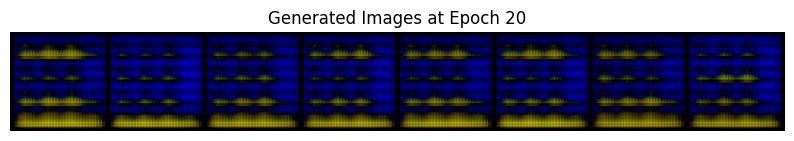

Generated images displayed after training and validation.


In [ ]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

def show_generated_images(fake_images, epoch, num_images=8):
    """Function to display generated images."""
    grid = vutils.make_grid(fake_images, nrow=num_images)
    plt.figure(figsize=(10, 15))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.axis('off')
    plt.title(f"Generated Images at Epoch {epoch + 1}")
    plt.show()

with torch.no_grad():
    fake_noise = get_noise(8, z_dim, device='cpu')
    one_hot_labels = torch.zeros(8, n_classes)
    noise_and_labels = combine_vectors(fake_noise, one_hot_labels)
    final_fake_images = gen(noise_and_labels)

    show_generated_images(final_fake_images, epoch)

print("Generated images displayed after training and validation.")


Third Part:
We need to evaluate the performance of each generative model and it's effect on the perfomance of the model.
As a result:
Train the data after augmentation using:
 1. Simple CNN.
 2. Resnet 50.
 3. XGBoost.
Then Compare the results.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [1/20], Train Loss: 1.0488, Validation Loss: 0.9609, Accuracy: 0.4513, Precision: 0.3726, Recall: 0.3810, F1-score: 0.2794
Model improved and saved.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [2/20], Train Loss: 0.9135, Validation Loss: 0.8094, Accuracy: 0.7282, Precision: 0.4915, Recall: 0.6147, F1-score: 0.5449
Model improved and saved.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [3/20], Train Loss: 0.6788, Validation Loss: 0.6418, Accuracy: 0.7385, Precision: 0.5045, Recall: 0.6234, F1-score: 0.5546
Model improved and saved.
Epoch [4/20], Train Loss: 0.5498, Validation Loss: 0.4495, Accuracy: 0.7795, Precision: 0.8501, Recall: 0.6808, F1-score: 0.6535
Model improved and saved.
Epoch [5/20], Train Loss: 0.4365, Validation Loss: 0.2836, Accuracy: 0.9231, Precision: 0.9388, Recall: 0.9047, F1-score: 0.9172
Model improved and saved.
Epoch [6/20], Train Loss: 0.3271, Validation Loss: 0.2262, Accuracy: 0.9333, Precision: 0.9482, Recall: 0.9171, F1-score: 0.9287
Model improved and saved.
Epoch [7/20], Train Loss: 0.2534, Validation Loss: 0.1866, Accuracy: 0.9590, Precision: 0.9677, Recall: 0.9540, F1-score: 0.9595
Model improved and saved.
Epoch [8/20], Train Loss: 0.2153, Validation Loss: 0.2262, Accuracy: 0.9487, Precision: 0.9492, Recall: 0.9453, F1-score: 0.9470
No improvement. Early stopping counter: 1/5
Epoch [9/20], Train Loss: 0.1650, Validation Loss: 0

<ipython-input-20-ebd3571dde6c>:113: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


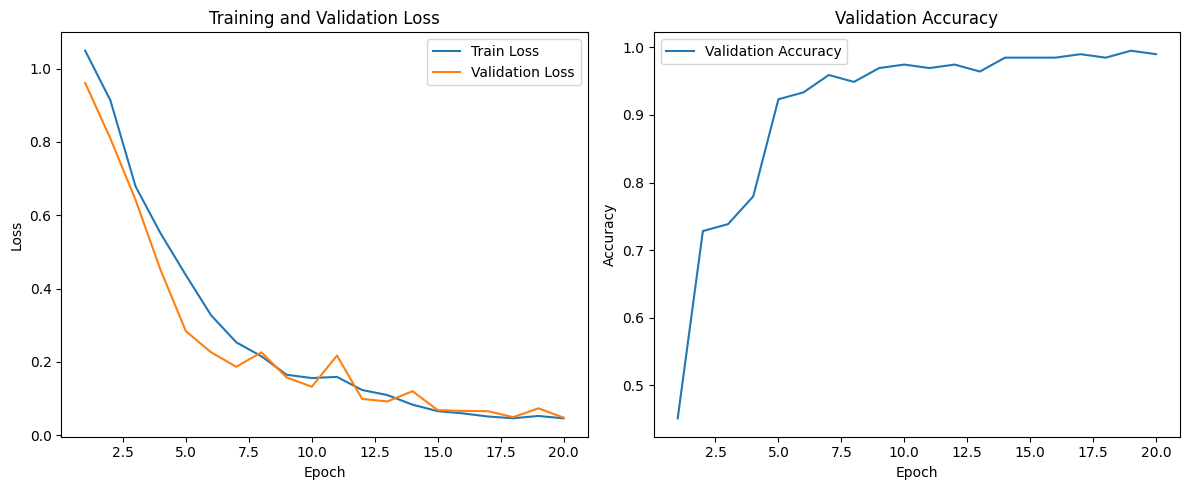

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 20
patience = 5
best_f1 = 0
early_stop_counter = 0

import matplotlib.pyplot as plt

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

    train_losses.append(epoch_train_loss / len(train_loader))  # Average train loss

    model.eval()
    all_predictions = []
    all_labels = []
    epoch_val_loss = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            epoch_val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_losses.append(epoch_val_loss / len(val_loader))
    accuracy = accuracy_score(all_labels, all_predictions)
    val_accuracies.append(accuracy)

    precision = precision_score(all_labels, all_predictions, average='macro')
    recall = recall_score(all_labels, all_predictions, average='macro')
    f1 = f1_score(all_labels, all_predictions, average='macro')

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Validation Loss: {val_losses[-1]:.4f}, "
          f"Accuracy: {accuracy:.4f}, "
          f"Precision: {precision:.4f}, "
          f"Recall: {recall:.4f}, "
          f"F1-score: {f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_model.pth")
        print("Model improved and saved.")
    else:
        early_stop_counter += 1
        print(f"No improvement. Early stopping counter: {early_stop_counter}/{patience}")

    if early_stop_counter >= patience:
        print("Early stopping triggered. Stopping training.")
        break


model.load_state_dict(torch.load("best_model.pth"))
print("Best model loaded for further evaluation or use.")

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

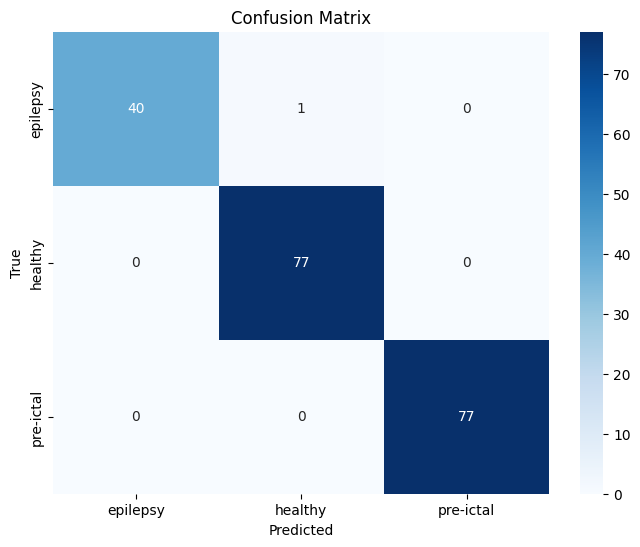

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['epilepsy', 'healthy', 'pre-ictal'],
            yticklabels=['epilepsy', 'healthy', 'pre-ictal'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [25]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

X_train = []
y_train = []
for images, labels in train_loader:
    X_train.extend(images.view(images.size(0), -1).cpu().numpy())
    y_train.extend(labels.cpu().numpy())
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = []
y_val = []
for images, labels in val_loader:
    X_val.extend(images.view(images.size(0), -1).cpu().numpy())
    y_val.extend(labels.cpu().numpy())
X_val = np.array(X_val)
y_val = np.array(y_val)


model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)


y_pred_xgb = model_xgb.predict(X_val)


accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
precision_xgb = precision_score(y_val, y_pred_xgb, average='macro', zero_division=0)
recall_xgb = recall_score(y_val, y_pred_xgb, average='macro', zero_division=0)
f1_xgb = f1_score(y_val, y_pred_xgb, average='macro', zero_division=0)

print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1-score: {f1_xgb:.4f}")



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:49:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.9949, Precision: 0.9957, Recall: 0.9957, F1-score: 0.9957


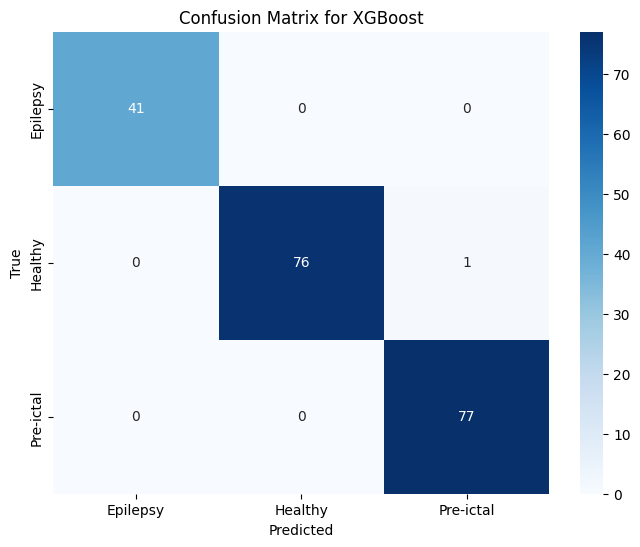

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Epilepsy', 'Healthy', 'Pre-ictal'],
            yticklabels=['Epilepsy', 'Healthy', 'Pre-ictal'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for XGBoost")
plt.show()